<a href="https://colab.research.google.com/github/rchoudhury2003/Demand-Forecasting-using-STL/blob/main/Inventory_Supply_Optimization_with_Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Text Handling Libraries
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Construct the download URL
file_id = '1qbPUoK7BMwXLVbJumSSflYSNsoD6A77Z'
download_url = f'https://drive.google.com/uc?id={file_id}'

# Read the CSV file into a DataFrame
df = pd.read_csv(download_url)

# Display the first few rows of the DataFrame
print(df.head())

   index                                            product  \
0      1             Garlic Oil - Vegetarian Capsule 500 mg   
1      2                              Water Bottle - Orange   
2      3                     Brass Angle Deep - Plain, No.2   
3      4  Cereal Flip Lid Container/Storage Jar - Assort...   
4      5                 Creme Soft Soap - For Hands & Body   

                 category           sub_category              brand  \
0        Beauty & Hygiene              Hair Care  Sri Sri Ayurveda    
1  Kitchen, Garden & Pets  Storage & Accessories         Mastercook   
2    Cleaning & Household            Pooja Needs                Trm   
3    Cleaning & Household   Bins & Bathroom Ware             Nakoda   
4        Beauty & Hygiene       Bath & Hand Wash              Nivea   

   sale_price  market_price                      type  rating  \
0       220.0         220.0          Hair Oil & Serum     4.1   
1       180.0         180.0    Water & Fridge Bottles     2.3   

In [ ]:
df.shape

(27555, 10)

In [ ]:
df.isnull().sum()

,0
index,0
product,1
category,0
sub_category,0
brand,1
sale_price,0
market_price,0
type,0
rating,8626
description,115


In [ ]:
print('Percentage Null Data In Each Column')
print('-'*30)
for col in df.columns:
    null_count = df[col].isnull().sum()
    total_count = df.shape[0]
    print("{} : {:.2f}".format(col,null_count/total_count * 100))

Percentage Null Data In Each Column
------------------------------
index : 0.00
product : 0.00
category : 0.00
sub_category : 0.00
brand : 0.00
sale_price : 0.00
market_price : 0.00
type : 0.00
rating : 31.30
description : 0.42


In [ ]:
print('Total Null Data')
null_count = df.isnull().sum().sum()
total_count = np.product(df.shape)
print("{:.2f}".format(null_count/total_count * 100))

Total Null Data
3.17


So overall 3% data is missing but 31% of ratings are missing. Since we are going to create a recommender system, let's drop the null values as their will still be over 69% data for recommendation purposes which is enough for us.

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
index,0
product,0
category,0
sub_category,0
brand,0
sale_price,0
market_price,0
type,0
rating,0
description,0


In [ ]:
df.shape

(18840, 10)

In [ ]:
# df.to_csv('data_cleaned.csv')

So even after dropping null data, 18000+ products are available for recommendation.

**Exploratory Data Analysis**

In [ ]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1wf0Rdpyk9qBfdoq_QlbxwoTmjyMXfBmhw5cSKwW569A#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
counts = df['category'].value_counts()

counts_df = pd.DataFrame({'Category':counts.index,'Counts':counts.values})

In [ ]:
px.bar(data_frame=counts_df,
 x='Category',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 text_auto=True,
 title=f'Count of Items in Each Category')

In [ ]:
counts = df['sub_category'].value_counts()

counts_df_1 = pd.DataFrame({'Category':counts.index,'Counts':counts.values})[:10]

In [ ]:
px.bar(data_frame=counts_df_1,
 x='Category',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 text_auto=True,
 title=f'Top 10 Bought Sub_Categories')

In [ ]:
counts = df['brand'].value_counts()

counts_df_brand = pd.DataFrame({'Brand Name':counts.index,'Counts':counts.values})[:10]

In [ ]:
 px.bar(data_frame=counts_df_brand,
 x='Brand Name',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 text_auto=True,
 title=f'Top 10 Brand Items based on Item Counts')

In [ ]:
counts = df['type'].value_counts()

counts_df_type = pd.DataFrame({'Type':counts.index,'Counts':counts.values})[:10]

In [ ]:
px.bar(data_frame=counts_df_type,
 x='Type',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 text_auto=True,
 title=f'Top 10 Types of Products based on Item Counts')

**Demographic Filter Recommendor**

In [ ]:
def sort_recommendor(col='rating',sort_type = False):
    """
    A recommendor based on sorting products on the column passed.
    Arguments to be passed:

    col: The Feature to be used for recommendation.
    sort_type: True for Ascending Order
    """
    rated_recommend = df.copy()
    if rated_recommend[col].dtype == 'O':
        col='rating'
    rated_recommend = rated_recommend.sort_values(by=col,ascending = sort_type)
    return rated_recommend[['product','brand','sale_price','rating']].head(10)

In [ ]:
help(sort_recommendor)

Help on function sort_recommendor in module __main__:

sort_recommendor(col='rating', sort_type=False)
    A recommendor based on sorting products on the column passed.
    Arguments to be passed:
    
    col: The Feature to be used for recommendation.
    sort_type: True for Ascending Order



In [ ]:
sort_recommendor(col='sale_price',sort_type=True)

,product,brand,sale_price,rating
21312,Serum,Livon,3.0,2.5
18290,Sugar Coated Chocolate,Cadbury Gems,5.0,4.2
21228,Dish Shine Bar,Exo,5.0,4.2
14538,Cadbury Perk - Chocolate Bar,Cadbury,5.0,4.2
19538,Layer Cake - Chocolate,Winkies,5.0,4.2
2978,Sugar Free Chewing Gum - Mixed Fruit,Orbit,5.0,4.2
15926,Dreams Cup Cake - Choco,Elite,5.0,3.9
6014,Good Day Butter Cookies,Britannia,5.0,4.1
27413,Layer Cake - Orange,Winkies,5.0,4.1
11306,Happy Happy Choco-Chip Cookies,Parle,5.0,4.2


our top product has rating of 2.5 which is quite bad so let's filter down by setting a threshold rating.

In [ ]:
C= df['rating'].mean()
C

3.9430626326963902

So the average rating of products is 3.94 Let's use 3.5 as the threshold.

In [ ]:
def sort_recommendor(col='rating',sort_type = False):
    """
    A recommendor based on sorting products on the column passed.
    Arguments to be passed:

    col: The Feature to be used for recommendation.
    sort_type: True for Ascending Order
    """
    rated_recommend = df.copy().loc[df['rating'] >= 3.5]
    if rated_recommend[col].dtype == 'O':
        col='rating'
    rated_recommend = rated_recommend.sort_values(by=col,ascending = sort_type)
    return rated_recommend[['product','brand','sale_price','rating']].head(10)

In [ ]:
sort_recommendor(col='sale_price',sort_type=True)

,product,brand,sale_price,rating
2761,Orbit Sugar-Free Chewing Gum - Lemon & Lime,Wrigleys,5.0,4.2
3445,Marie Light Biscuits - Active,Sunfeast,5.0,4.5
14603,50-50 Timepass Biscuits,Britannia,5.0,3.9
17640,Hand Wash - Moisture Shield,Savlon,5.0,4.4
27490,50-50 Timepass Salted Biscuits,Britannia,5.0,4.2
26584,Polo - The Mint With The Hole,Nestle,5.0,4.4
2978,Sugar Free Chewing Gum - Mixed Fruit,Orbit,5.0,4.2
19538,Layer Cake - Chocolate,Winkies,5.0,4.2
19202,Bounce Biscuits - Choco Creme,Sunfeast,5.0,4.2
14538,Cadbury Perk - Chocolate Bar,Cadbury,5.0,4.2


Notice that the 2.5 rated product is not recommended now!! This was our first recommendor.

**Content Based Recommendor**

In [ ]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


Let's try using other features such as Category, Sub Category, Brand, Type and Description for much better Recommendation.
We will be using NLP here to extract useful info from the features especially

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'])
tfidf_matrix.shape

(18840, 23342)

Now to compute the similarity score, let's use Linear_Kernel.
Linear Kernel which Calculates the Dot Product of the tfidf_matrix and returns an aggreate value depicting the Similarity score.

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.01632718, 0.00999603, ..., 0.01056047, 0.01133156,
        0.        ],
       [0.01632718, 1.        , 0.00719713, ..., 0.        , 0.        ,
        0.        ],
       [0.00999603, 0.00719713, 1.        , ..., 0.00635776, 0.        ,
        0.        ],
       ...,
       [0.01056047, 0.        , 0.00635776, ..., 1.        , 0.        ,
        0.        ],
       [0.01133156, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

So we will be recommending items based on similarity score.
But our problem is that we will be getting back the similarity scores so we will be sorting the scores.
Now we need a reverse-map to get the title and that is what indices is for.

In [ ]:
indices = pd.Series(df.index, index=df['product']).drop_duplicates()

def get_recommendations_1(title, cosine_sim=cosine_sim):

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['product'].iloc[movie_indices]

In [ ]:
get_recommendations_1('Water Bottle - Orange')

,product
11320,"Rectangular Plastic Container - With Lid, Mult..."
11642,"Jar - With Lid, Yellow"
26451,"Round & Flat Storage Container - With lid, Green"
6163,Premium Rectangular Plastic Container With Lid...
9546,Premium Round Plastic Container With Lid - Yellow
13959,Premium Rectangular Plastic Container With Lid...
19381,Premium Round & Flat Storage Container With Li...
24255,Premium Round Plastic Container With Lid - Blue
26067,Premium Round Plastic Container With Lid - Mul...
26074,Premium Round Plastic Container With Lid - Pink


In [ ]:
get_recommendations_1('Cadbury Perk - Chocolate Bar')

,product
17385,Cashew Nuts - Salted
23126,Nutrione - Baked Cashew Nuts
11962,Signature Roasted & Salted Cashew/Godambi - W240
23600,Cashews
11947,Sunflower Seeds - Raw
8765,Chilli Nut Chaat
1986,Whole Cashew/Godambi - Jumbo
2907,Cashew - Salted
21538,Salted Party Mix - Premium International
25887,Broken Cashew/Godambi


Our search was chocolate yet we got Cashews and Nuts recommended.
We need to optimize this based on category, sub_category and brand.

In [ ]:
df2 = df.copy()

In [ ]:
df2.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [ ]:
df2.shape

(18840, 10)

Notice that a product can be in multiple catergories and sub_categories and they are separated with a &.
Let's split them into a list for futher processes.

In [ ]:
rmv_spc = lambda a:a.strip()
get_list = lambda a:list(map(rmv_spc,re.split('& |, |\*|\n', a)))

In [ ]:
get_list('A & B, C')

['A', 'B', 'C']

In [ ]:
for col in ['category', 'sub_category', 'type']:
    df2[col] = df2[col].apply(get_list)

In [ ]:
df2.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,"[Beauty, Hygiene]",[Hair Care],Sri Sri Ayurveda,220.0,220.0,"[Hair Oil, Serum]",4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"[Kitchen, Garden, Pets]","[Storage, Accessories]",Mastercook,180.0,180.0,"[Water, Fridge Bottles]",2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2","[Cleaning, Household]",[Pooja Needs],Trm,119.0,250.0,"[Lamp, Lamp Oil]",3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,"[Cleaning, Household]","[Bins, Bathroom Ware]",Nakoda,149.0,176.0,"[Laundry, Storage Baskets]",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,"[Beauty, Hygiene]","[Bath, Hand Wash]",Nivea,162.0,162.0,"[Bathing Bars, Soaps]",4.4,Nivea Creme Soft Soap gives your skin the best...


To avoid duplicacy, we will be converting everything to lowercase and also removing spaces between words.
This will ensure that our recommendor doesn't consider Chocolate of Cholocate IceCream and Chocolate Bar as the same.

In [ ]:
def cleaner(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
for col in ['category', 'sub_category', 'type','brand']:
    df2[col] = df2[col].apply(cleaner)

In [ ]:
df2.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,"[beauty, hygiene]",[haircare],srisriayurveda,220.0,220.0,"[hairoil, serum]",4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"[kitchen, garden, pets]","[storage, accessories]",mastercook,180.0,180.0,"[water, fridgebottles]",2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2","[cleaning, household]",[poojaneeds],trm,119.0,250.0,"[lamp, lampoil]",3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,"[cleaning, household]","[bins, bathroomware]",nakoda,149.0,176.0,"[laundry, storagebaskets]",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,"[beauty, hygiene]","[bath, handwash]",nivea,162.0,162.0,"[bathingbars, soaps]",4.4,Nivea Creme Soft Soap gives your skin the best...


We will now be joining the values of category, sub_category, type and brand

In [ ]:
def couple(x):
    return ' '.join(x['category']) + ' ' + ' '.join(x['sub_category']) + ' '+x['brand']+' ' +' '.join( x['type'])
df2['soup'] = df2.apply(couple, axis=1)

In [ ]:
df2['soup'].head()

,soup
0,beauty hygiene haircare srisriayurveda hairoil...
1,kitchen garden pets storage accessories master...
2,cleaning household poojaneeds trm lamp lampoil
3,cleaning household bins bathroomware nakoda la...
4,beauty hygiene bath handwash nivea bathingbars...


We need to Count the String Vectors and then compute the Cosine Similarity Score.

In [ ]:
df2.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,soup
0,1,Garlic Oil - Vegetarian Capsule 500 mg,"[beauty, hygiene]",[haircare],srisriayurveda,220.0,220.0,"[hairoil, serum]",4.1,This Product contains Garlic Oil that is known...,beauty hygiene haircare srisriayurveda hairoil...
1,2,Water Bottle - Orange,"[kitchen, garden, pets]","[storage, accessories]",mastercook,180.0,180.0,"[water, fridgebottles]",2.3,"Each product is microwave safe (without lid), ...",kitchen garden pets storage accessories master...
2,3,"Brass Angle Deep - Plain, No.2","[cleaning, household]",[poojaneeds],trm,119.0,250.0,"[lamp, lampoil]",3.4,"A perfect gift for all occasions, be it your m...",cleaning household poojaneeds trm lamp lampoil
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,"[cleaning, household]","[bins, bathroomware]",nakoda,149.0,176.0,"[laundry, storagebaskets]",3.7,Multipurpose container with an attractive desi...,cleaning household bins bathroomware nakoda la...
4,5,Creme Soft Soap - For Hands & Body,"[beauty, hygiene]","[bath, handwash]",nivea,162.0,162.0,"[bathingbars, soaps]",4.4,Nivea Creme Soft Soap gives your skin the best...,beauty hygiene bath handwash nivea bathingbars...


In [ ]:
df2.to_csv('data_cleaned_1.csv')

In [ ]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

We need to Count the String Vectors and then compute the Cosine Similarity Score

In [ ]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
cosine_sim2

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.27216553],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.27216553, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['product'])

In [ ]:
def get_recommendations_2(title, cosine_sim=cosine_sim):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return df2['product'].iloc[movie_indices]

Comparing Old and New Recommedations

In [ ]:
old_rec = get_recommendations_1('Water Bottle - Orange').values
new_rec = get_recommendations_2('Water Bottle - Orange', cosine_sim2).values

pd.DataFrame({'Old Recommendor': old_rec,'New Recommendor':new_rec})

,Old Recommendor,New Recommendor
0,"Rectangular Plastic Container - With Lid, Mult...",Glass Water Bottle - Aquaria Organic Purple
1,"Jar - With Lid, Yellow",Glass Water Bottle With Round Base - Transpare...
2,"Round & Flat Storage Container - With lid, Green",H2O Unbreakable Water Bottle - Pink
3,Premium Rectangular Plastic Container With Lid...,Water Bottle H2O Purple
4,Premium Round Plastic Container With Lid - Yellow,H2O Unbreakable Water Bottle - Green
5,Premium Rectangular Plastic Container With Lid...,Regel Tritan Plastic Sports Water Bottle - Black
6,Premium Round & Flat Storage Container With Li...,Apsara 1 Water Bottle - Assorted Colour
7,Premium Round Plastic Container With Lid - Blue,"Glass Water Bottle With Round Base - Yellow, B..."
8,Premium Round Plastic Container With Lid - Mul...,Trendy Stainless Steel Bottle With Steel Cap -...
9,Premium Round Plastic Container With Lid - Pink,"Penta Plastic Pet Water Bottle - Violet, Wide ..."


In [ ]:
old_rec = get_recommendations_1('Cadbury Perk - Chocolate Bar').values
new_rec = get_recommendations_2('Cadbury Perk - Chocolate Bar', cosine_sim2).values

pd.DataFrame({'Old Recommendor': old_rec,'New Recommendor':new_rec})

,Old Recommendor,New Recommendor
0,Cadbury Perk - Chocolate Bar,Nutties Chocolate Pack
1,Choco Stick - Hexagon Pack,5 Star Chocolate Bar
2,Luvit Chocwich White Home Delights 187 g,Dairy Milk Silk - Hazelnut Chocolate Bar
3,Luvit Chocwich Home Delights 187 g,"Perk - Chocolate, Home Treats, 175.5 g, 27 Units"
4,Wafer Biscuits - Chocolate Flavor,Dark Milk Chocolate Bar
5,Drinking Chocolate - Original,Dairy Milk Silk Mousse - Chocolate Bar
6,Drinking Chocolate - Original,Dark Milk Chocolate Bar
7,Biscuit - Bourbon Creams,Chocolate Bar - Fuse
8,Wafers With Hazelnut Cream,Choclairs Gold Coffee
9,Choco Stick - Chocolate,"5 Star Chocolate Home Pack, 200 g, 20 units"


Implementing STL

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [ ]:
import pandas as pd
import numpy as np

# Generate a date range for one month
date_range = pd.date_range(start='2024-01-01', end='2024-01-31', freq='D')

# Simulate sales data with random values
# For example, let's assume sales are between 1000 to 10000
np.random.seed(0)  # For reproducibility
sales_data = np.random.randint(1000, 10001, size=len(date_range))

# Create the DataFrame
df_sales = pd.DataFrame({
    'date': date_range,
    'sales': sales_data
})

# Save this DataFrame to a CSV file
csv_file_path = 'BigBasket_Sales_Data.csv'  # Modify the path as needed
df_sales.to_csv(csv_file_path, index=False)

# Display the first few rows of the generated DataFrame
print(df_sales.head())

        date  sales
0 2024-01-01   3732
1 2024-01-02   4264
2 2024-01-03   5859
3 2024-01-04   8891
4 2024-01-05   5373


In [ ]:
import pandas as pd
import numpy as np

# Step 1: Construct the download URL from the file ID
file_id = '1qbPUoK7BMwXLVbJumSSflYSNsoD6A77Z'
download_url = f'https://drive.google.com/uc?id={file_id}'

# Step 2: Load the original CSV file from Google Drive
original_df = pd.read_csv(download_url)

# Display the first few rows of the original DataFrame
print("Original DataFrame:")
print(original_df.head())

# Step 3: Generate a date range and sales data
# Assuming the original DataFrame needs daily sales for January 2024
date_range = pd.date_range(start='2024-01-01', end='2024-01-31', freq='D')
sales_data = np.random.randint(1000, 10001, size=len(date_range))

# Step 4: Create a new DataFrame for the new columns
new_data_df = pd.DataFrame({
    'date': date_range,
    'sales': sales_data
})

# Step 5: Combine the original DataFrame with the new data
# Here we concatenate the new data columns to the original DataFrame
# Ensure the lengths match or adjust as necessary
# This example assumes you want to add them directly.
original_df = pd.concat([original_df, new_data_df], axis=1)

# Step 6: Save the modified DataFrame back to a new CSV file
# Specify the path in your Google Drive where you want to save the modified file
modified_file_path = '/content/drive/MyDrive/Modified_BigBasket_Products.csv'  # Adjust the path as needed

# Save the modified DataFrame to the specified path
original_df.to_csv(modified_file_path, index=False)

# Display a success message
print(f"Modified DataFrame saved to: {modified_file_path}")

# Display the first few rows of the modified DataFrame
print(original_df.head())

Original DataFrame:
   index                                            product  \
0      1             Garlic Oil - Vegetarian Capsule 500 mg   
1      2                              Water Bottle - Orange   
2      3                     Brass Angle Deep - Plain, No.2   
3      4  Cereal Flip Lid Container/Storage Jar - Assort...   
4      5                 Creme Soft Soap - For Hands & Body   

                 category           sub_category              brand  \
0        Beauty & Hygiene              Hair Care  Sri Sri Ayurveda    
1  Kitchen, Garden & Pets  Storage & Accessories         Mastercook   
2    Cleaning & Household            Pooja Needs                Trm   
3    Cleaning & Household   Bins & Bathroom Ware             Nakoda   
4        Beauty & Hygiene       Bath & Hand Wash              Nivea   

   sale_price  market_price                      type  rating  \
0       220.0         220.0          Hair Oil & Serum     4.1   
1       180.0         180.0    Water & Fridg

Lets implement STL

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [ ]:
file_id = '1aSOjakWWoFDF3BpL6hM-gnEWuNfPzFWl'
download_url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(download_url)

In [ ]:
# Step 2: Prepare the data
# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [ ]:
df = df.resample('M').sum()  # Resample to monthly data, summing sales

<ipython-input-67-b591646a5aad>:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
df = df.resample('ME').sum()  # Resample to monthly data, summing sales

In [ ]:
df_monthly = df.resample('ME').sum()

In [ ]:
print("Monthly Sales Data:")
print(df_monthly)

Monthly Sales Data:
            index                                            product  \
date                                                                   
2024-01-31    496  Garlic Oil - Vegetarian Capsule 500 mgWater Bo...   

                                                     category  \
date                                                            
2024-01-31  Beauty & HygieneKitchen, Garden & PetsCleaning...   

                                                 sub_category  \
date                                                            
2024-01-31  Hair CareStorage & AccessoriesPooja NeedsBins ...   

                                                        brand  sale_price  \
date                                                                        
2024-01-31  Sri Sri Ayurveda MastercookTrmNakodaNiveaNatur...     6900.19   

            market_price                                               type  \
date                                                        

In [ ]:
# Check if there are any missing dates
print("Missing dates:", df_monthly.isnull().sum())


Missing dates: index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
sales           0
dtype: int64


In [ ]:
# Fill any missing values if necessary (optional)
df_monthly = df_monthly.fillna(0)

Adding more data for monthly analysis


In [ ]:
import pandas as pd
import numpy as np

# Step 1: Load your CSV file from Google Drive
file_id = '1aSOjakWWoFDF3BpL6hM-gnEWuNfPzFWl'
download_url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(download_url)

# Display the original DataFrame
print("Original DataFrame:")
print(df.head())

# Step 2: Generate monthly sales data for the year 2024
date_range = pd.date_range(start='2024-01-01', end='2024-12-31', freq='M')
sales_data = np.random.randint(5000, 20001, size=len(date_range))  # Random sales values

# Create a new DataFrame with the generated monthly sales data
monthly_sales_df = pd.DataFrame({
    'date': date_range,
    'sales': sales_data
})

# Step 3: Combine the original DataFrame with the new monthly sales data
# Adjust as needed; here, we're simply adding the new data as new columns
df_combined = pd.concat([df, monthly_sales_df], axis=1)

# Step 4: Save the modified DataFrame back to Google Drive
# Specify the path in your Google Drive where you want to save the modified file
modified_file_path = '/content/drive/MyDrive/Modified_BigBasket_Products2.csv'  # Adjust the path as needed

df_combined.to_csv(modified_file_path, index=False)

# Display the first few rows of the combined DataFrame
print("Modified DataFrame:")
print(df_combined.head())

# Provide the path of the saved file
print(f"Modified data saved to: {modified_file_path}")

Original DataFrame:
   index                                            product  \
0      1             Garlic Oil - Vegetarian Capsule 500 mg   
1      2                              Water Bottle - Orange   
2      3                     Brass Angle Deep - Plain, No.2   
3      4  Cereal Flip Lid Container/Storage Jar - Assort...   
4      5                 Creme Soft Soap - For Hands & Body   

                 category           sub_category              brand  \
0        Beauty & Hygiene              Hair Care  Sri Sri Ayurveda    
1  Kitchen, Garden & Pets  Storage & Accessories         Mastercook   
2    Cleaning & Household            Pooja Needs                Trm   
3    Cleaning & Household   Bins & Bathroom Ware             Nakoda   
4        Beauty & Hygiene       Bath & Hand Wash              Nivea   

   sale_price  market_price                      type  rating  \
0       220.0         220.0          Hair Oil & Serum     4.1   
1       180.0         180.0    Water & Fridg

<ipython-input-77-215af9e0490b>:14: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



Modified DataFrame:
   index                                            product  \
0      1             Garlic Oil - Vegetarian Capsule 500 mg   
1      2                              Water Bottle - Orange   
2      3                     Brass Angle Deep - Plain, No.2   
3      4  Cereal Flip Lid Container/Storage Jar - Assort...   
4      5                 Creme Soft Soap - For Hands & Body   

                 category           sub_category              brand  \
0        Beauty & Hygiene              Hair Care  Sri Sri Ayurveda    
1  Kitchen, Garden & Pets  Storage & Accessories         Mastercook   
2    Cleaning & Household            Pooja Needs                Trm   
3    Cleaning & Household   Bins & Bathroom Ware             Nakoda   
4        Beauty & Hygiene       Bath & Hand Wash              Nivea   

   sale_price  market_price                      type  rating  \
0       220.0         220.0          Hair Oil & Serum     4.1   
1       180.0         180.0    Water & Fridg

In [ ]:
import pandas as pd

# Update the file_id to the new dataset's file ID
new_file_id = '10U0atU9eZpa3kC3hGFflkGV0KY7j7PP9'  # New file ID
download_url = f'https://drive.google.com/uc?id={new_file_id}'

# Load the new dataset from Google Drive with specified encoding
try:
    df = pd.read_csv(download_url, encoding='ISO-8859-1')  # Change to 'utf-16' if necessary
except UnicodeDecodeError as e:
    print(f"Encoding error: {e}")
    # Attempt with a different encoding if necessary
    df = pd.read_csv(download_url, encoding='utf-16')

# Display the first few rows of the new DataFrame
print("New DataFrame:")
print(df.head())

New DataFrame:
   index                                            product  \
0      1             Garlic Oil - Vegetarian Capsule 500 mg   
1      2                              Water Bottle - Orange   
2      3                     Brass Angle Deep - Plain, No.2   
3      4  Cereal Flip Lid Container/Storage Jar - Assort...   
4      5                 Creme Soft Soap - For Hands & Body   

                 category           sub_category              brand  \
0        Beauty & Hygiene              Hair Care  Sri Sri Ayurveda    
1  Kitchen, Garden & Pets  Storage & Accessories         Mastercook   
2    Cleaning & Household            Pooja Needs                Trm   
3    Cleaning & Household   Bins & Bathroom Ware             Nakoda   
4        Beauty & Hygiene       Bath & Hand Wash              Nivea   

   sale_price  market_price                      type  rating  \
0       220.0         220.0          Hair Oil & Serum     4.1   
1       180.0         180.0    Water & Fridge Bot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL



In [ ]:
df['date'] = pd.to_datetime(df['date'])  # Ensure 'date' is in datetime format
df.set_index('date', inplace=True)


<ipython-input-83-9e683bce4f97>:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [ ]:
df = df.resample('M').sum()

<ipython-input-84-a036d3709276>:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
df = df.resample('ME').sum()

In [ ]:
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

Weekly Chart

In [ ]:
stl = STL(df['sales'], seasonal=7)  # Assuming monthly data; use seasonal=12 for yearly seasonality
result = stl.fit()

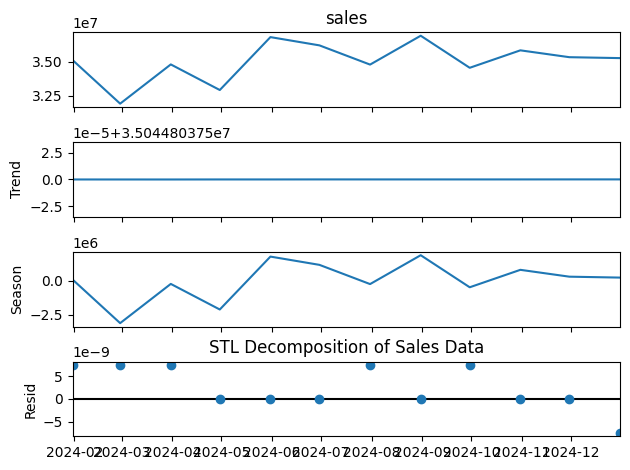

In [ ]:
result.plot()
plt.title('STL Decomposition of Sales Data')
plt.show()

Monthly chart

In [ ]:
stl = STL(df['sales'], seasonal=13)  # Assuming monthly data; use seasonal=12 for yearly seasonality
result = stl.fit()

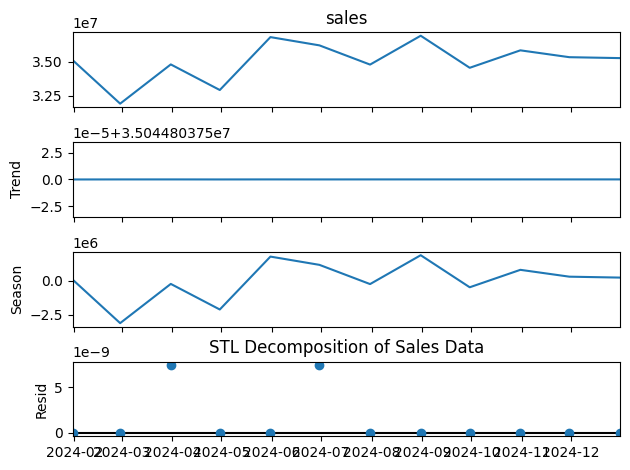

In [ ]:
result.plot()
plt.title('STL Decomposition of Sales Data')
plt.show()

**Recommending products**

In [ ]:
# For demonstration, let's create a sample DataFrame
products_data = {
    'product': ['Product A', 'Product B', 'Product C', 'Product D', 'Product E'],
    'sales': [100, 200, 150, 300, 250],
    'seasonal_peak_month': ['December', 'November', 'October', 'December', 'November']
}

In [ ]:
df = pd.DataFrame(products_data)

In [ ]:
# Step 1: Identify Trending Products
# Calculate sales trend (e.g., using moving average for simplicity)
df['trend'] = df['sales'].rolling(window=3).mean()  # Simple moving average over the last 3 months

In [ ]:
# Identify trending products (e.g., those with increasing trend)
trending_products = df[df['trend'] > df['sales']].sort_values(by='trend', ascending=False)

In [ ]:
# Step 2: Seasonal Recommendations
current_month = 'December'  # Example current month
seasonal_recommendations = df[df['seasonal_peak_month'] == current_month]

In [ ]:
# Step 3: Combine Recommendations
recommended_products = pd.concat([trending_products, seasonal_recommendations]).drop_duplicates()

In [ ]:
# Display Recommendations
print("Recommended Products:")
print(recommended_products[['product', 'sales', 'trend', 'seasonal_peak_month']])

Recommended Products:
     product  sales       trend seasonal_peak_month
0  Product A    100         NaN            December
3  Product D    300  216.666667            December
